In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('diabetes.csv')

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [16]:
X = df.iloc[:,:-1].values
y = df['Outcome'].values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# choose normalization when we know that the particular column or data will be between some range and other normal reasons like when 
# following gaussain curve and all.Rest standarization for the remaining reasons

In [19]:
X.shape

(768, 8)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [30]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [28]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim = 8))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/home/vraj/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [170]:
model.fit(X_train,y_train,batch_size=32,epochs=9,validation_data=(X_test,y_test))

Epoch 1/9


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4345 - loss: 0.7713 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 2/9
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6267 - loss: 0.6678 - val_accuracy: 0.6234 - val_loss: 0.6541
Epoch 3/9
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6335 - loss: 0.6416 - val_accuracy: 0.7143 - val_loss: 0.6053
Epoch 4/9
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6938 - loss: 0.6011 - val_accuracy: 0.7468 - val_loss: 0.5697
Epoch 5/9
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.5767 - val_accuracy: 0.7532 - val_loss: 0.5431
Epoch 6/9
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7260 - loss: 0.5387 - val_accuracy: 0.7727 - val_loss: 0.5222
Epoch 7/9
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7057 - loss: 0.5384 - val_accuracy: 0.7727 - val_loss: 0.5080
Epoch 8/9
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 0.4987 - val_accuracy: 0.7727 - val_loss: 0.4948
Epoch 9/9


In [4]:
import kerastuner as kt

2024-07-26 14:17:13.146828: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 14:17:13.158070: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 14:17:13.248063: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-26 14:17:13.330873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 14:17:13.436037: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

<h3>Hyperparamter tuning for optimizers</h3>

In [186]:
def build_model(hp):

    model = Sequential()

    model.add(Dense(32,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))

    # model.compile(optimizer=hp.Choice('optimizer',['adam','sgd','adadelta','rmsprop']))

    optimizer = hp.Choice('optimizer',values = ['adam','sgd','adadelta','rmsprop'])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

    return model


In [187]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='opt_dir')

In [188]:
%%capture
tuner.search(X_train, y_train, epochs=4, validation_data=(X_test, y_test))

In [189]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [190]:
model = tuner.get_best_models(num_models=1)[0]

/home/vraj/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [160]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7830 - loss: 0.5168 - val_accuracy: 0.7922 - val_loss: 0.4899
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7657 - loss: 0.4969 - val_accuracy: 0.7922 - val_loss: 0.4761
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7948 - loss: 0.4696 - val_accuracy: 0.8052 - val_loss: 0.4668
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - loss: 0.4700 - val_accuracy: 0.8052 - val_loss: 0.4619
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4349 - val_accuracy: 0.8052 - val_loss: 0.4585
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7724 - loss: 0.4612 - val_accuracy: 0.8052 - val_loss: 0.4582
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.4687 - val_accuracy: 0.7987 - val_loss: 0.4584
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7856 - loss: 0.4364 - val_accuracy: 0.805

<h3>Hyperparamter tuning for no of nodes</h3>

In [219]:
def build_model(hp):

    model = Sequential()

    units = hp.Int('units',min_value=8, max_value=128, 
                   step=8
                   )
    model.add(Dense(units,activation='relu',input_dim = 8))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy' ,metrics=['accuracy'])
    
    return model
    

In [220]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='unit_dir')

In [221]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.7662337422370911

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 05s


In [224]:
tuner.get_best_hyperparameters()[0].values

{'units': 96}

In [225]:
model = tuner.get_best_models(num_models=1)[0]

In [226]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=5,validation_data=(X_test,y_test))

Epoch 6/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7827 - loss: 0.4800 - val_accuracy: 0.8117 - val_loss: 0.4860
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7737 - loss: 0.4831 - val_accuracy: 0.8052 - val_loss: 0.4776
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7793 - loss: 0.4672 - val_accuracy: 0.8052 - val_loss: 0.4719
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.4548 - val_accuracy: 0.8052 - val_loss: 0.4672
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.4648 - val_accuracy: 0.8117 - val_loss: 0.4662
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.4680 - val_accuracy: 0.7987 - val_loss: 0.4650
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.4584 - val_accuracy: 0.7987 - val_loss: 0.4629
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7772 - loss: 0.4458 - val_accuracy: 0.7922 - val_loss:

<h3>No of layers</h3>

In [227]:
def build_model(hp):
    model = Sequential()

    model.add(Dense(96,activation='relu',input_dim=8))

    for i in range(hp.Int('layers',min_value=1,max_value=10)):
        model.add(Dense(96,activation='relu'))
    
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [233]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials = 5,directory='num_layers',project_name = 'num_layers')

In [234]:
tuner.search(X_train,y_train,epochs = 5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.8181818127632141

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 08s


In [239]:
tuner.get_best_hyperparameters()[0].values

{'layers': 7}

In [240]:
model = tuner.get_best_models(num_models=1)[0]

/home/vraj/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/vraj/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [242]:
model.fit(X_train,y_train,epochs=100 ,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7898e-06 - val_accuracy: 0.7338 - val_loss: 3.1583
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.3137e-06 - val_accuracy: 0.7338 - val_loss: 3.1960
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.1642e-06 - val_accuracy: 0.7338 - val_loss: 3.2225
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4136e-06 - val_accuracy: 0.7338 - val_loss: 3.2490
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5358e-06 - val_accuracy: 0.7338 - val_loss: 3.2811
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.9897e-06 - val_accuracy: 0.7338 - val_loss: 3.2953
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.1276e-06 - val_accuracy: 0.7338 - val_loss: 3.3175
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 

In [73]:
def build_model(hp):
    model = Sequential()

    counter = 0

    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):

        if counter==0:
            model.add(Dense(
                hp.Int('units'+ str(i),min_value=8,max_value=128,step=8), 
                # in for loop each iteration should have unique values as per documentation, hence name + str(i)
                activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                input_dim=8
            ))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else :
            model.add(Dense(
                hp.Int('units'+ str(i),min_value=8,max_value=128,step=8),
                activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                ))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
    
    model.add(Dense(1,activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer',values=['adam','rmsprop','adadelta','sgd','nadam']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [64]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',directory='final_tuner1',project_name = 'final_tuner1')

/home/vraj/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
tuner.get_best_hyperparameters()

[]

In [66]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.8116883039474487
Total elapsed time: 00h 00m 56s


In [67]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 104,
 'activation0': 'tanh',
 'dropout0': 0.7,
 'optimizer': 'adam',
 'units1': 104,
 'activation1': 'relu',
 'dropout1': 0.7,
 'units2': 40,
 'activation2': 'sigmoid',
 'dropout2': 0.1,
 'units3': 88,
 'activation3': 'relu',
 'dropout3': 0.4,
 'units4': 88,
 'activation4': 'relu',
 'dropout4': 0.3,
 'units5': 120,
 'activation5': 'sigmoid',
 'dropout5': 0.3,
 'units6': 24,
 'activation6': 'tanh',
 'dropout6': 0.9,
 'units7': 112,
 'activation7': 'relu',
 'dropout7': 0.2,
 'units8': 88,
 'activation8': 'sigmoid',
 'dropout8': 0.6,
 'units9': 64,
 'activation9': 'relu',
 'dropout9': 0.8}

In [68]:
model = tuner.get_best_models(num_models=1)[0]

/home/vraj/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [83]:
history = model.fit(X_train,y_train,epochs=900,initial_epoch=5,validation_data=(X_test,y_test))

Epoch 6/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8512 - loss: 0.3506 - val_accuracy: 0.8247 - val_loss: 0.6421
Epoch 7/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8119 - loss: 0.3736 - val_accuracy: 0.8247 - val_loss: 0.6422
Epoch 8/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8122 - loss: 0.3858 - val_accuracy: 0.8182 - val_loss: 0.6393
Epoch 9/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7823 - loss: 0.4082 - val_accuracy: 0.8182 - val_loss: 0.6462
Epoch 10/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8099 - loss: 0.3940 - val_accuracy: 0.8182 - val_loss: 0.6420
Epoch 11/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8168 - loss: 0.3902 - val_accuracy: 0.8182 - val_loss: 0.6416
Epoch 12/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8092 - loss: 0.3657 - val_accuracy: 0.8182 - val_loss: 0.6423
Epoch 13/900
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8127 - loss: 0.4166 - val_accuracy: 0.8182

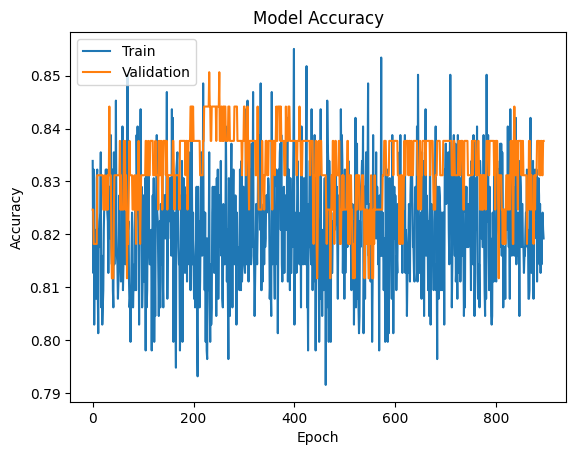

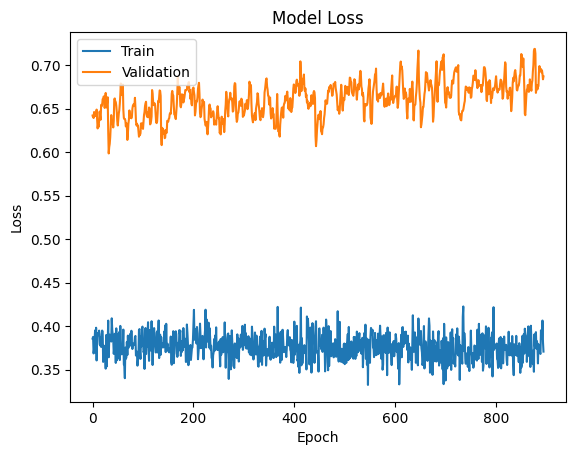

In [84]:
# plot history


import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()